Importing Necessary Libraries:

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

Loading and Pre-Processing Dataset:

In [254]:
# read dataset:
df = pd.read_csv(r"data/creditcard.csv")

In [255]:
# see dataset -- take a glance
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


See the range of values in each column:

In [257]:
for col in df.columns:
    print(f"{col} range: {round(df[col].quantile(0.001), 2)}, {round(df[col].quantile(0.999), 2)}")

Time range: 204.0, 172522.19
V1 range: -16.04, 2.34
V2 range: -15.13, 7.85
V3 range: -9.87, 3.39
V4 range: -4.16, 6.24
V5 range: -9.41, 8.07
V6 range: -5.29, 6.16
V7 range: -9.37, 7.97
V8 range: -13.1, 6.14
V9 range: -3.31, 5.96
V10 range: -5.21, 9.13
V11 range: -2.74, 3.84
V12 range: -5.7, 2.74
V13 range: -3.1, 3.24
V14 range: -7.34, 3.87
V15 range: -3.19, 2.63
V16 range: -4.03, 2.71
V17 range: -5.7, 4.05
V18 range: -3.35, 2.67
V19 range: -2.98, 3.39
V20 range: -6.62, 5.81
V21 range: -5.49, 7.88
V22 range: -3.12, 2.26
V23 range: -5.45, 4.76
V24 range: -2.0, 1.25
V25 range: -2.4, 1.87
V26 range: -1.28, 2.25
V27 range: -3.82, 2.61
V28 range: -2.63, 2.1
Amount range: 0.0, 3000.0
Class range: 0.0, 1.0


In [258]:
# all column names:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [259]:
print(f"Shape of dataset is: {df.shape}")

Shape of dataset is: (284807, 31)


In [260]:
# Drop time column:
df = df.drop("Time", axis = 1)

In [261]:
print(f"New shape of dataset is: {df.shape}")

New shape of dataset is: (284807, 30)


In [262]:
# check duplicated rows:
df.duplicated().sum()

9144

In [263]:
# Drop the duplicated rows:
df = df.drop_duplicates()

In [264]:
df.reset_index(inplace=True, drop= True)

In [265]:
print(f"New shape of dataset is: {df.shape}")

New shape of dataset is: (275663, 30)


In [266]:
# checking null values:
df.isnull().sum().any()

False

In [267]:
X = df.drop("Class", axis=1)
y = df["Class"]

Checking Whether it needs -- Dimensionality Reduction or NOT -- Based on Correlation:

In [269]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [270]:
pca = PCA(n_components=0.98)
sc = StandardScaler()

In [271]:
X_scaled = sc.fit_transform(X)

In [272]:
X_scaled.shape

(275663, 29)

In [273]:
X_pca = pca.fit_transform(X_scaled)

In [274]:
X_pca.shape

(275663, 28)

```Here, There is NO Need of PCA, Since feature variable is very weakly correlated.```

In [275]:
# plt.figure(figsize=(20, 34))
# sns.heatmap(np.corrcoef(X_pca.T), annot=True)

In [277]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275663 entries, 0 to 275662
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     27

In my dataset --> ```all columns have NUmerical datatype```.

In [278]:
# plt.figure(figsize = (8,4))
# x = 0
# for _ in df.columns[:-1]:
#     sns.histplot(data = df, x = _, kde = True)
#     print("\n")
#     plt.show()

<Axes: xlabel='Class'>

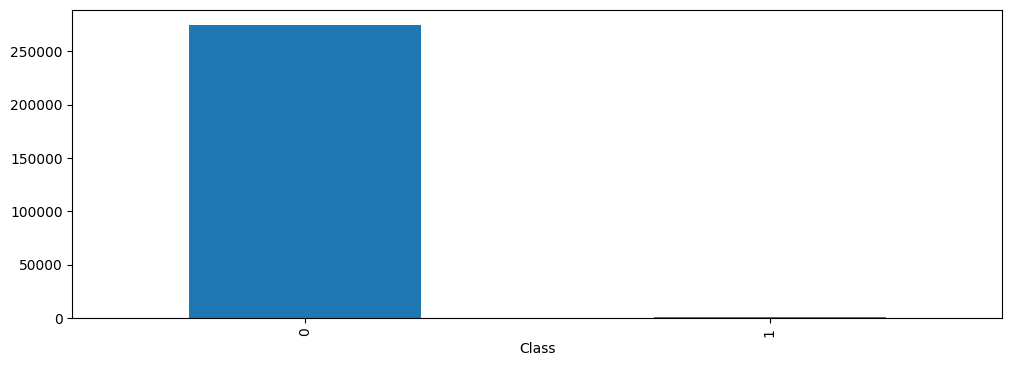

In [279]:
df["Class"].value_counts().plot(kind = "bar", figsize=(12,4))

In [280]:
df["Class"].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

## Huge Class Imbalance Issue:

#### SMOTE (Synthetic Minority Oversampling Technique) to Balance Dataset  
  
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.  
  
One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model. An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class.  
  
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.  
  
We use Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.

In [281]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [282]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Now you can use X_train_resampled and y_train_resampled for training your model

Class distribution before SMOTE:
Class
0    220148
1       382
Name: count, dtype: int64

Class distribution after SMOTE:
Class
0    220148
1    220148
Name: count, dtype: int64


In [283]:
X_train_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.697561,0.948635,-0.265964,0.232319,2.234194,3.852625,-0.207872,1.360338,-0.780520,-0.483250,...,0.089137,-0.041381,-0.234344,-0.225184,1.016926,0.380123,-0.203681,0.008106,0.036948,19.13
1,1.264899,0.049540,-0.952775,-0.070600,2.065511,3.424647,-0.528821,0.854294,-0.038103,0.022971,...,-0.000144,-0.327823,-1.124423,0.106592,0.943713,0.444564,-0.678490,0.031086,0.027166,9.95
2,-0.715606,0.513689,0.961015,-1.198394,0.583521,-0.829520,1.320615,-0.439369,0.047655,0.408184,...,0.260249,-0.127502,0.058932,-0.101983,0.020072,-0.306188,0.765075,0.049670,-0.194371,48.76
3,-2.139310,2.097059,-0.022686,1.456046,-1.022387,-0.087631,-0.754045,1.604350,-1.025693,-0.911668,...,-0.457860,0.226124,0.268603,-0.026230,0.126653,0.009085,-0.258654,-0.702756,-0.163966,14.99
4,-3.026331,1.801124,-1.896878,-2.520847,0.718708,3.298411,-1.318774,1.332548,-0.953841,1.280528,...,-0.349800,0.232285,-1.248408,0.180337,0.949543,0.119986,0.203583,-0.131442,-0.253182,49.99


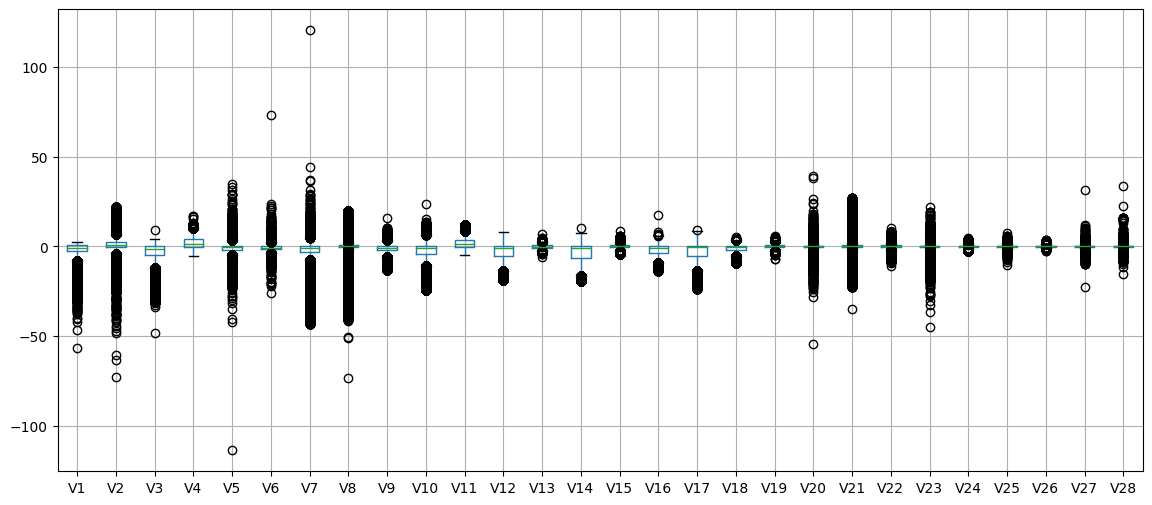

In [284]:
X_train_resampled.iloc[:, :-1].boxplot(figsize=(14,6))
plt.show();